<div style="color:white;background-color:Gray;padding:2%;border-radius:130px 130px;font-size:2em;text-align:center">Solar Power Generation Prediction & Fault/Abnormalities Analysis</div>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045"> PV Solar Power Plant: </h1>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. Importing Libraries
</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('precision',3)

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Importing Power Generation & Weather Sensor Data
</span>

In [3]:
generation_data = pd.read_csv('../input/solar-power/Plant_2_Generation_Data.csv')

In [4]:
weather_data = pd.read_csv('../input/solar-power/Plant_2_Weather_Sensor_Data.csv')

In [5]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
17162,2020-05-24 00:15:00,4136001,LYwnQax7tkwH5Cb,0.000,0.000,0.000,1795003600.000
33475,2020-06-01 18:45:00,4136001,PeE6FRyGXUgsRhN,0.000,0.000,4156.000,1348462300.000
65080,2020-06-16 18:15:00,4136001,4UPUqMRk7TRMgml,23.273,22.473,4998.933,2649043.933
44515,2020-06-07 00:30:00,4136001,LYwnQax7tkwH5Cb,0.000,0.000,3489.000,1795068872.000
18165,2020-05-24 14:00:00,4136001,xoJJ8DcxJEcupym,1098.047,1073.093,6633.800,209193352.800


In [6]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
36,2020-05-15 09:00:00,4136001,iq8k7ZNt4Mwm3w0,29.572,41.472,0.654
480,2020-05-20 00:30:00,4136001,iq8k7ZNt4Mwm3w0,24.692,22.599,0.000
452,2020-05-19 17:30:00,4136001,iq8k7ZNt4Mwm3w0,23.329,21.962,0.004
2958,2020-06-14 20:45:00,4136001,iq8k7ZNt4Mwm3w0,24.681,24.358,0.000
2971,2020-06-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,24.487,23.846,0.000


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. Adjust datetime format
</span>

In [7]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">4. Merging generation data and weather sensor data  
</span>

In [8]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
35450,2020-06-02 17:15:00,IQ2d7wF4YD8zU1Q,422.800,415.327,7042.000,20089316.000,30.724,36.516,0.260
59208,2020-06-13 23:30:00,9kRcWv60rDACzjR,0.000,0.000,2777.000,2247893016.000,23.966,22.416,0.000
6592,2020-05-18 03:00:00,mqwcsP2rE7J0TFp,0.000,0.000,0.000,593604358.000,25.032,24.975,0.000
55317,2020-06-12 03:15:00,LYwnQax7tkwH5Cb,0.000,0.000,3718.000,1795083077.000,22.836,22.475,0.000
6094,2020-05-17 21:30:00,4UPUqMRk7TRMgml,0.000,0.000,6342.000,2445231.000,27.909,27.563,0.000


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">5. Adding separate time and date columns  
</span>

In [9]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [10]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [11]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

In [12]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000
mean,246.702,241.278,3294.890,658944788.424,27.987,32.607,0.229,15.531,5.530,22.563,22.517,714.330
std,370.570,362.112,2919.448,729667771.073,4.021,11.226,0.309,8.528,0.499,1.475,16.764,415.672
min,0.000,0.000,0.000,0.000,20.942,20.265,0.000,1.000,5.000,20.000,0.000,0.000
25%,0.000,0.000,272.750,19964944.867,24.570,23.686,0.000,9.000,5.000,21.000,15.000,360.000
50%,0.000,0.000,2911.000,282627587.000,26.910,27.434,0.019,16.000,6.000,23.000,30.000,720.000
75%,446.592,438.215,5534.000,1348495113.000,30.913,40.019,0.431,22.000,6.000,24.000,45.000,1080.000
max,1420.933,1385.420,9873.000,2247916295.000,39.182,66.636,1.099,31.000,6.000,25.000,45.000,1425.000


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">6. Converting 'SOURCE_KEY' from categorical form to numerical form
</span>

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Data Visualization: </h1>

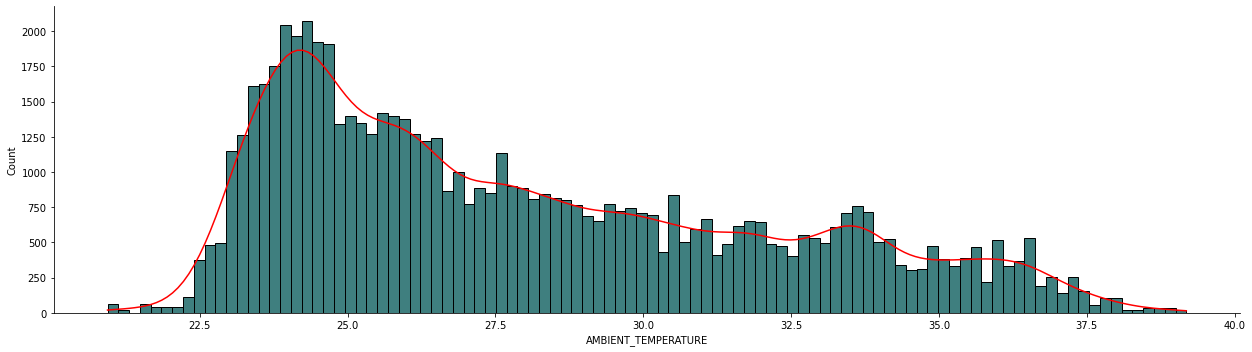

In [14]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [15]:
df_solar['DATE'].nunique()

34

<code style="background:yellow;color:red">The data of solar power generation is of 34 days </code>

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:#e90045">Faults & Abnormalities detection in solar power plant generation </h1>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">7. Multiple Plotting of DC_POWER generation on per day basis.
</span>

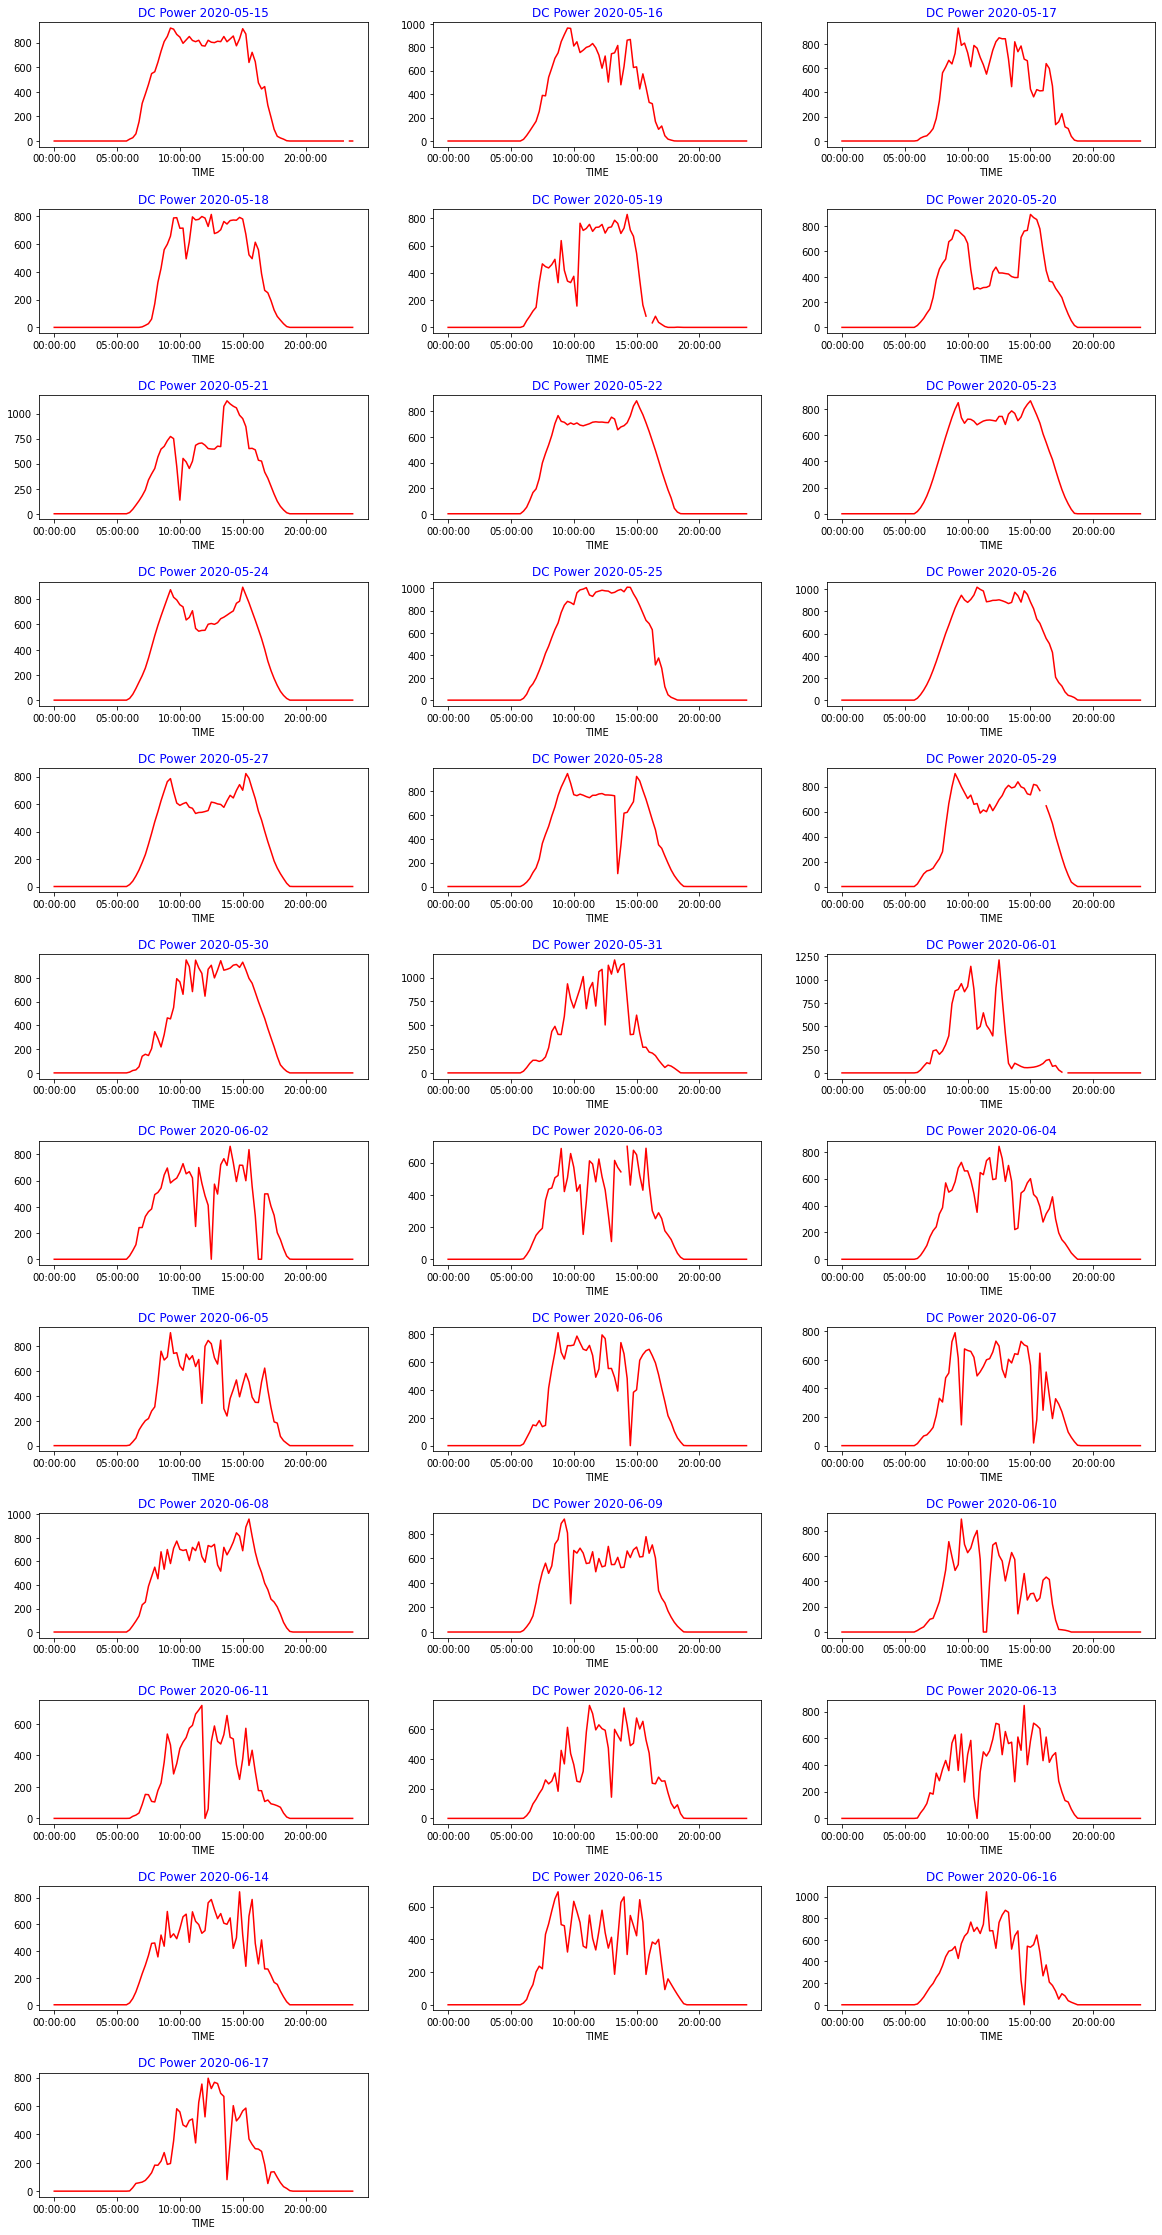

In [16]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

<span class="label label-default" style="background-color:pink; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:Red; ">Ideal Graph of Solar Power Generation 📊📈</span>

<img src="https://www.solarmarket.com.au/wp-content/uploads/2021/04/solar-output-graph.png" alt="Solar Panel" width="50%">
</center>

<span style="background-color:maroon;
             color:white;
             font-size:16px;
             text-align:center;
             border-radius:30px 30px;
             font-weight:bold;
             border:2px solid red;
             padding:5px">Abnormalities in DC_POWER Generation
</span>

**Form the per day DC_POWER generation graph we can find that, most of the days there is a some fluctuation in the power generation.**

*Less Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-15
> 2. 2020-05-18
> 3. 2020-05-22
> 4. 2020-05-23
> 5. 2020-05-24
> 6. 2020-05-25
> 7. 2020-05-26

*High Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-19
> 2. 2020-05-28
> 3. 2020-05-29
> 4. 2020-06-02
> 5. 2020-06-03
> 6. 2020-06-04
> 7. 2020-06-13
> 8. 2020-06-14
> 9. 2020-06-17

*Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.*

> 1. 2020-06-03
> 2. 2020-06-11
> 3. 2020-06-12
> 4. 2020-06-15

**Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further**

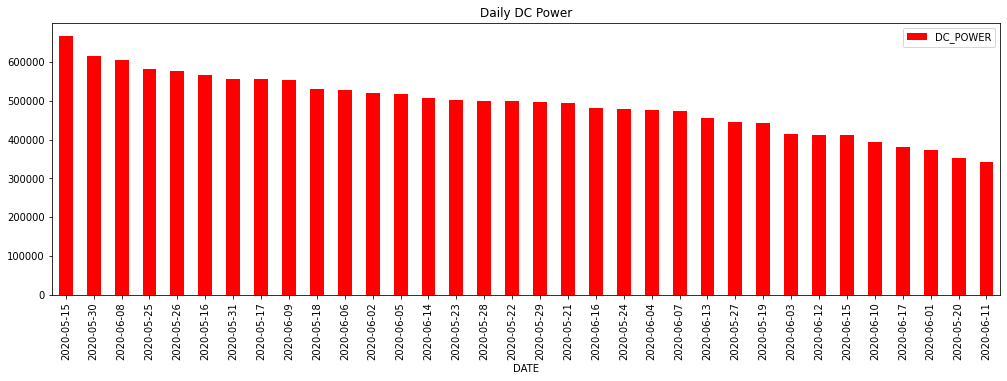

In [17]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

**Form the per day DC_POWER generation graph we can find the average power generation per day.**

> *Highest average DC_POWER Generation is on*: **2020-05-15**

> *Lowest average DC_POWER Generation is on* : **2020-06-11**

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: This Large variation in the DC_POWER generation is due to the fault in the system or due to weather change, which needs to study further. But from this bar plot we find the day on which there is highest DC_POWER is generated and the day with the lowest DC_POWER generated.
    </p>
</div>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">8. Multiple Plotting of IRRADIATION generation on per day basis.
</span>

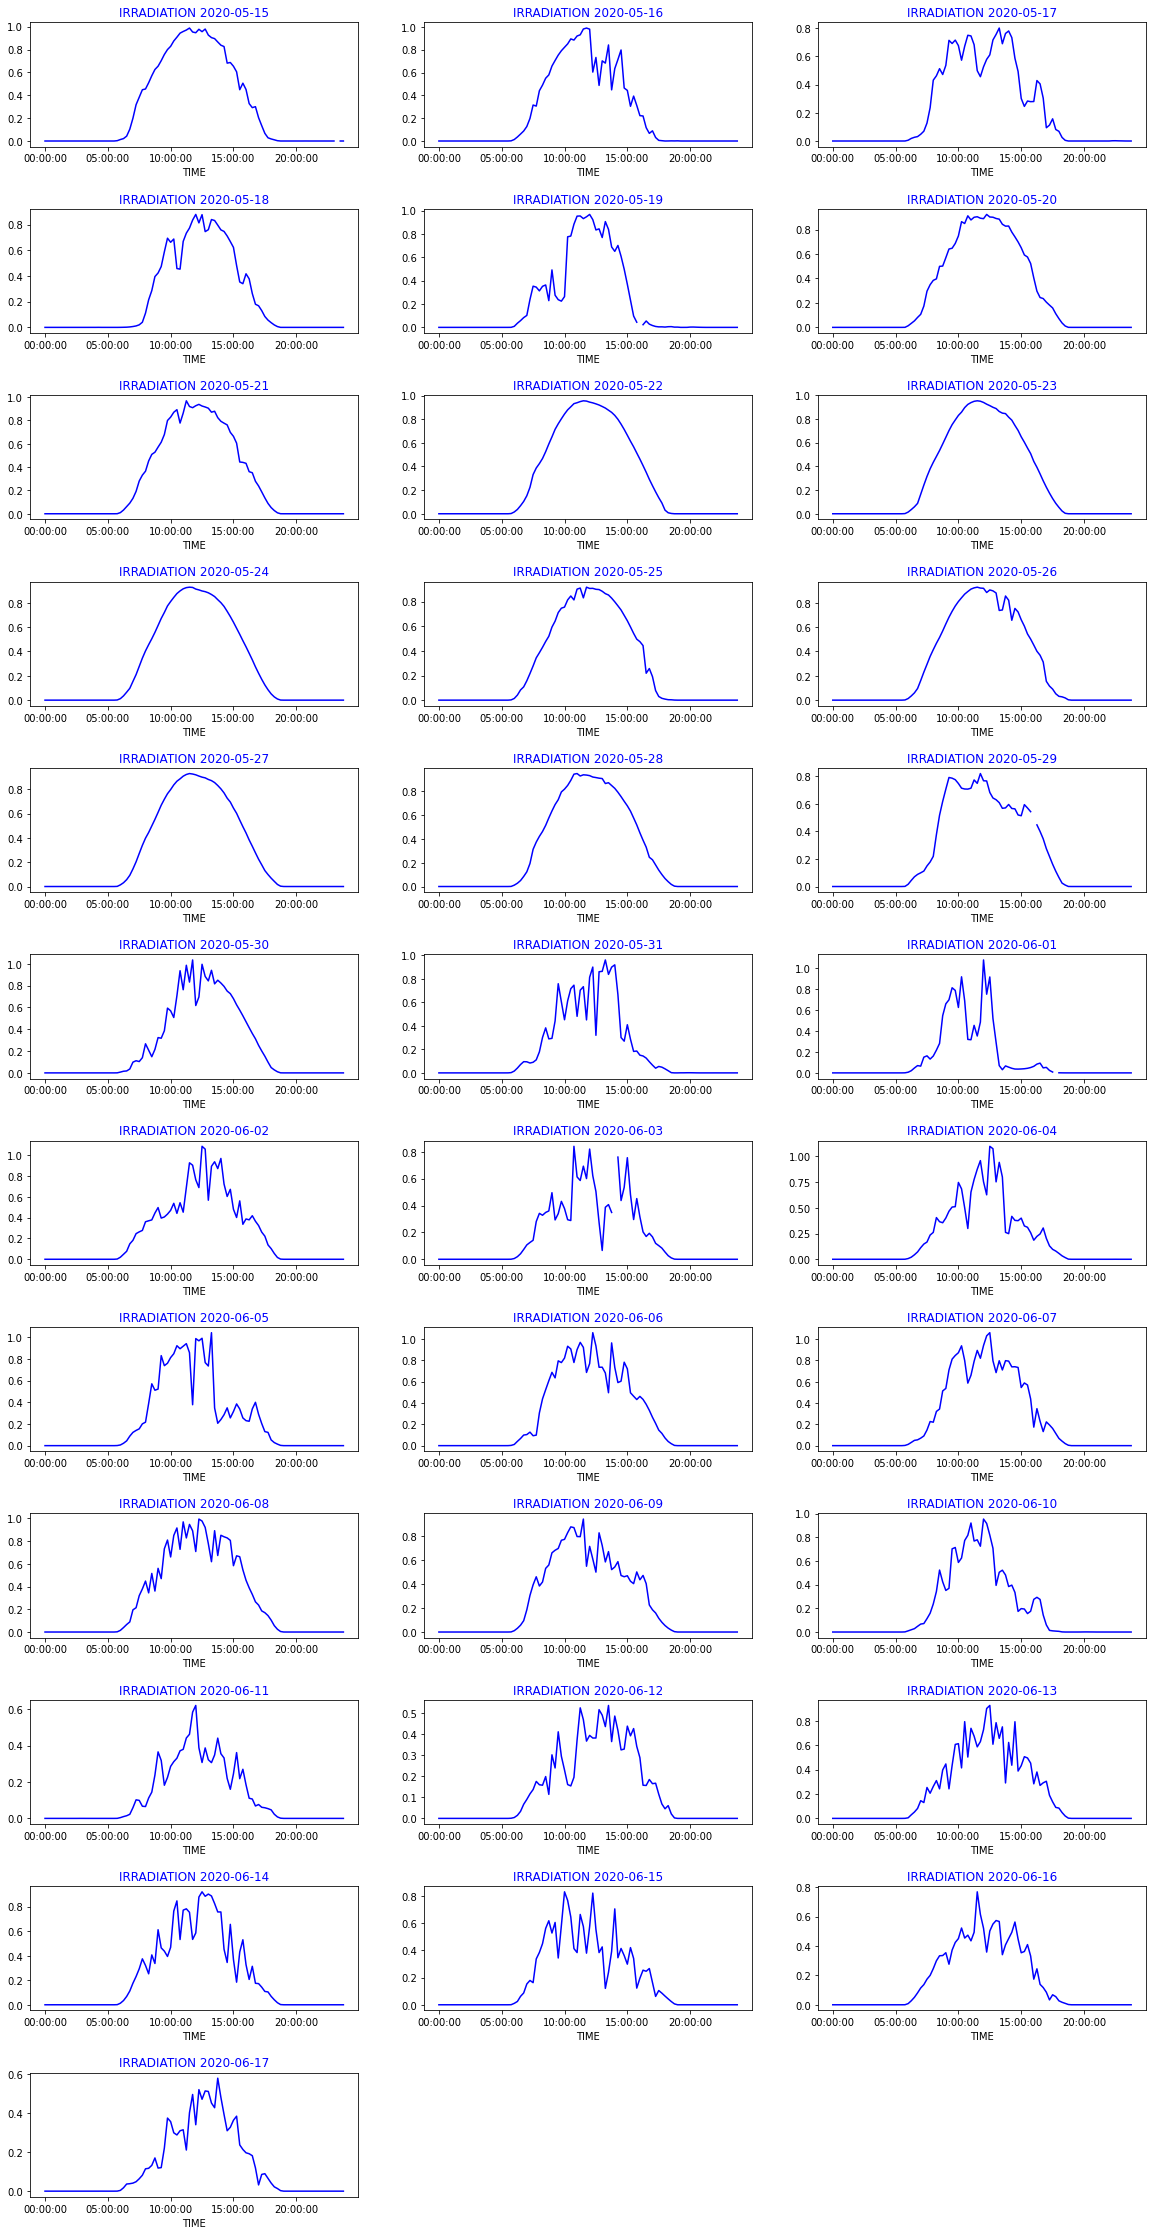

In [18]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

**IRRADIATION graph pattern is looking very similar to the corresponding DC_POWER generation on per day basis.** 

- In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

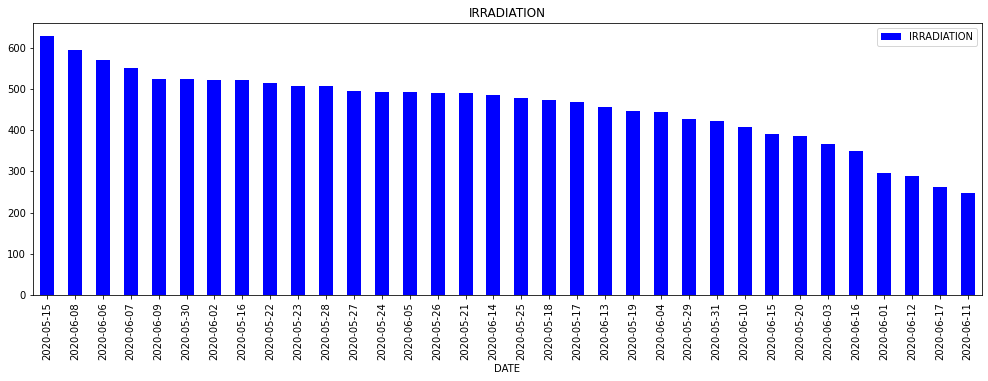

In [19]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

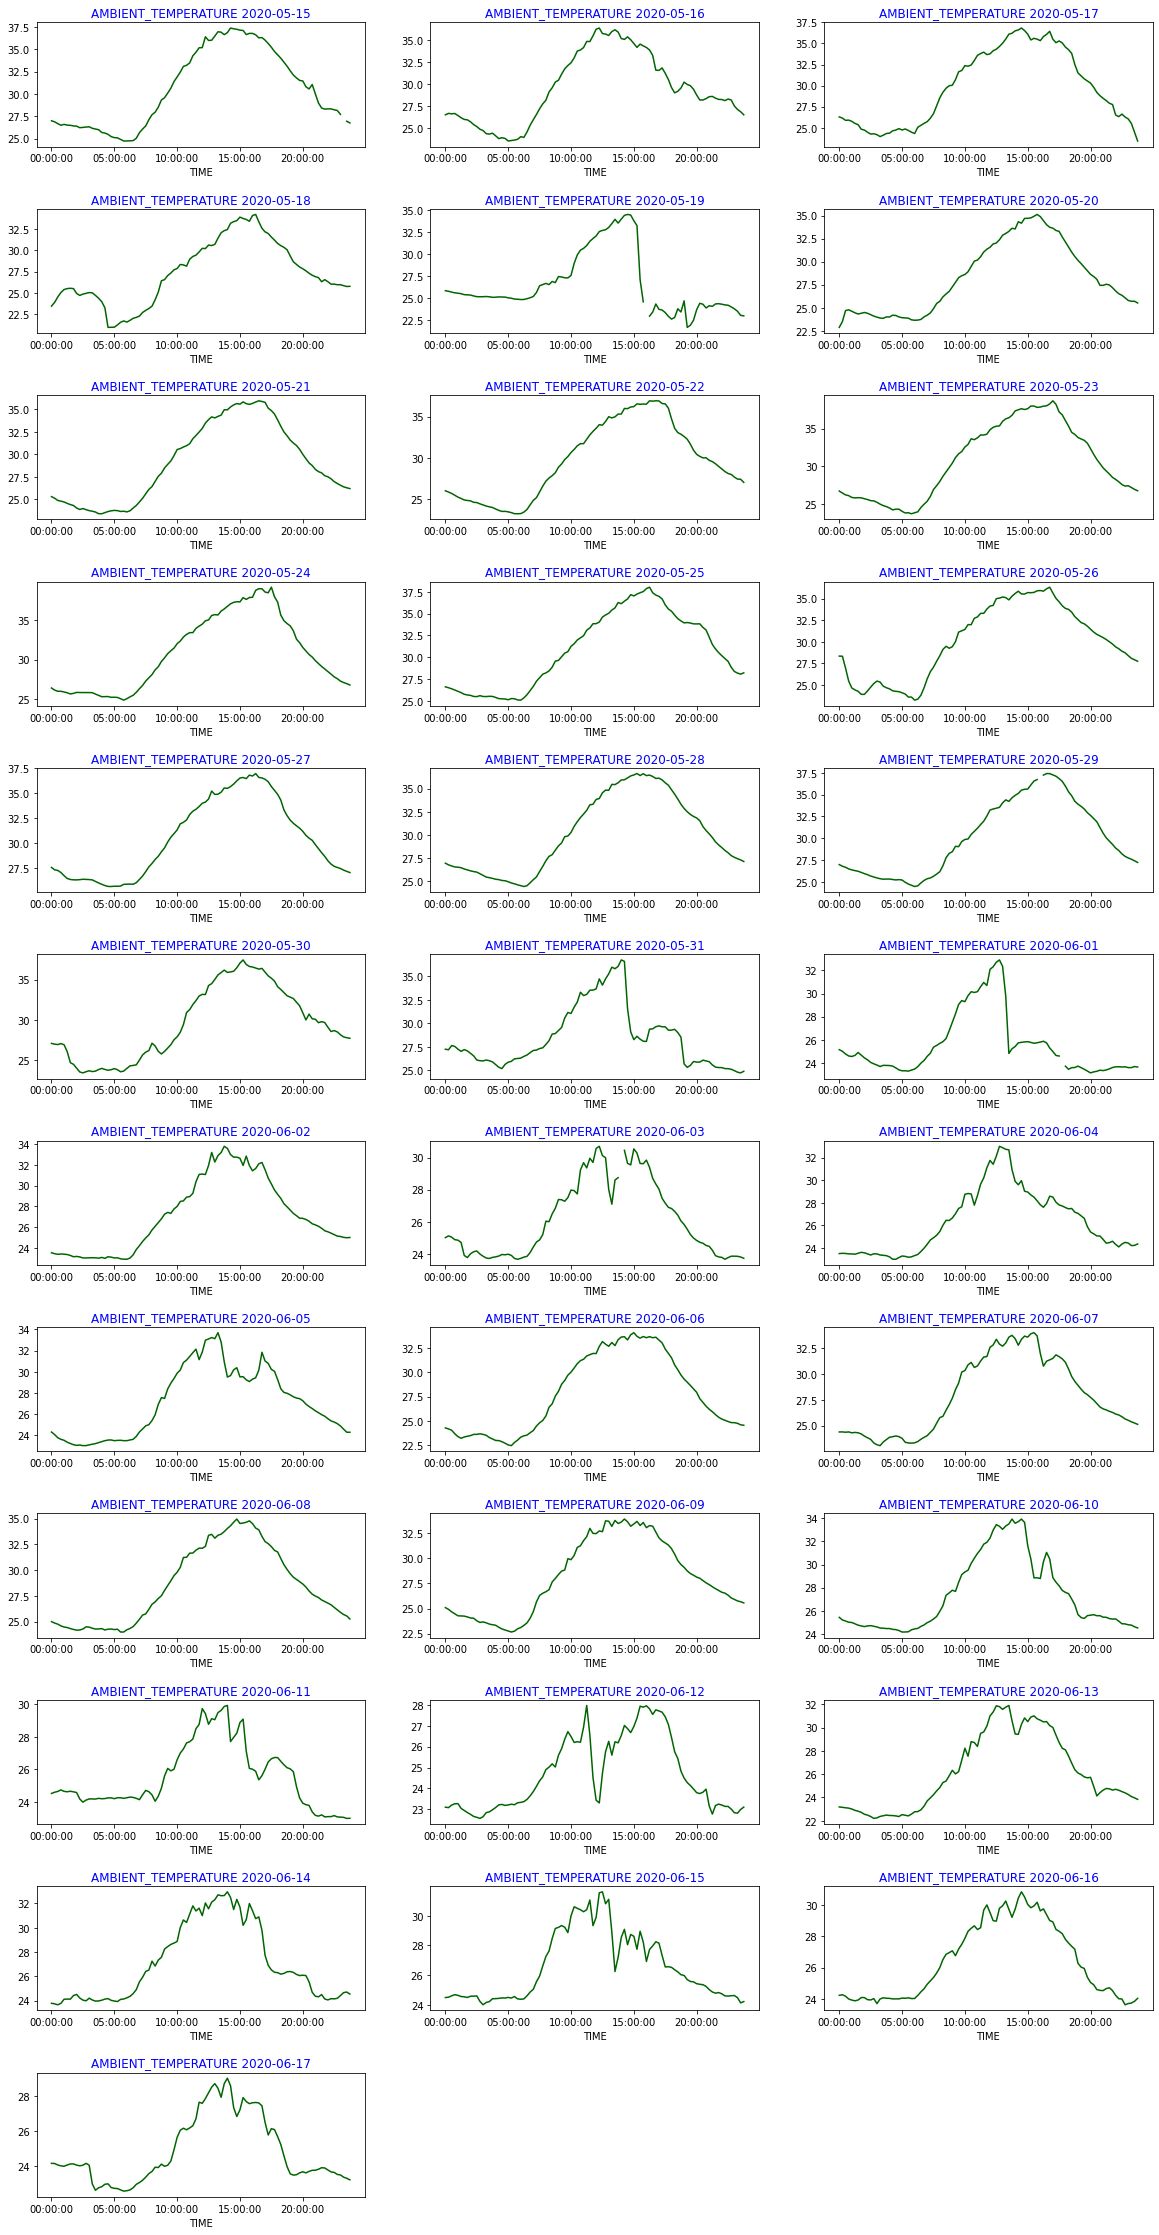

In [20]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

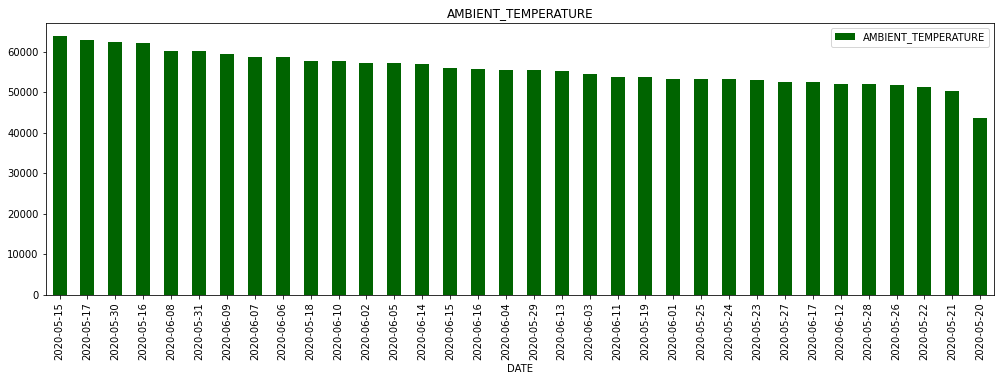

In [21]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:35px; color:#e90045">Best and Worst Power generation comparision: </h1>

<span class="label label-default" style="background-color:pink; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:Red; ">Major Environmental Factors affecting the of solar power generation are.</span>

> 1. The thickness of clouds is also a factor in how much sunlight your solar panels can soak up. We may see thicker clouds in winter too and this is something else to look out for. It’s hard for sunlight to travel through thick clouds, which will affect your solar power system’s output. 
> 2. While we’ve looked at the sun’s positioning and how it can affect output, there’s another factor to consider when your system may not be performing at its maximum… even at midday.
> 3. Solar panel temperature is the number one reason behind your solar power system not achieving peak performance
> 4. Solar power generation is directly depends on Irradiation comming from the sun.

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">9. Highest average DC_POWER is generated on "2020-05-15"  
</span>

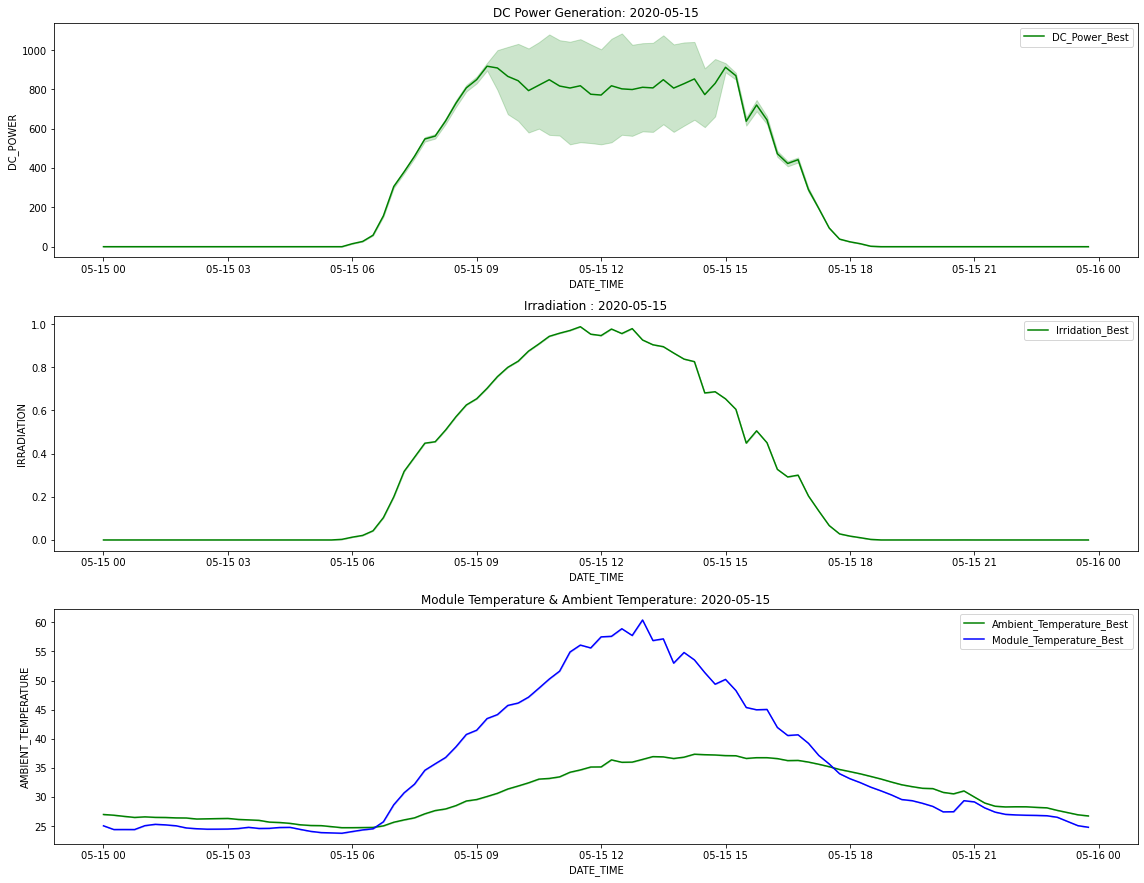

In [22]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.
    </p>
</div>

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">10. Lowest average DC_POWER is generated on "2020-06-11"  
</span>

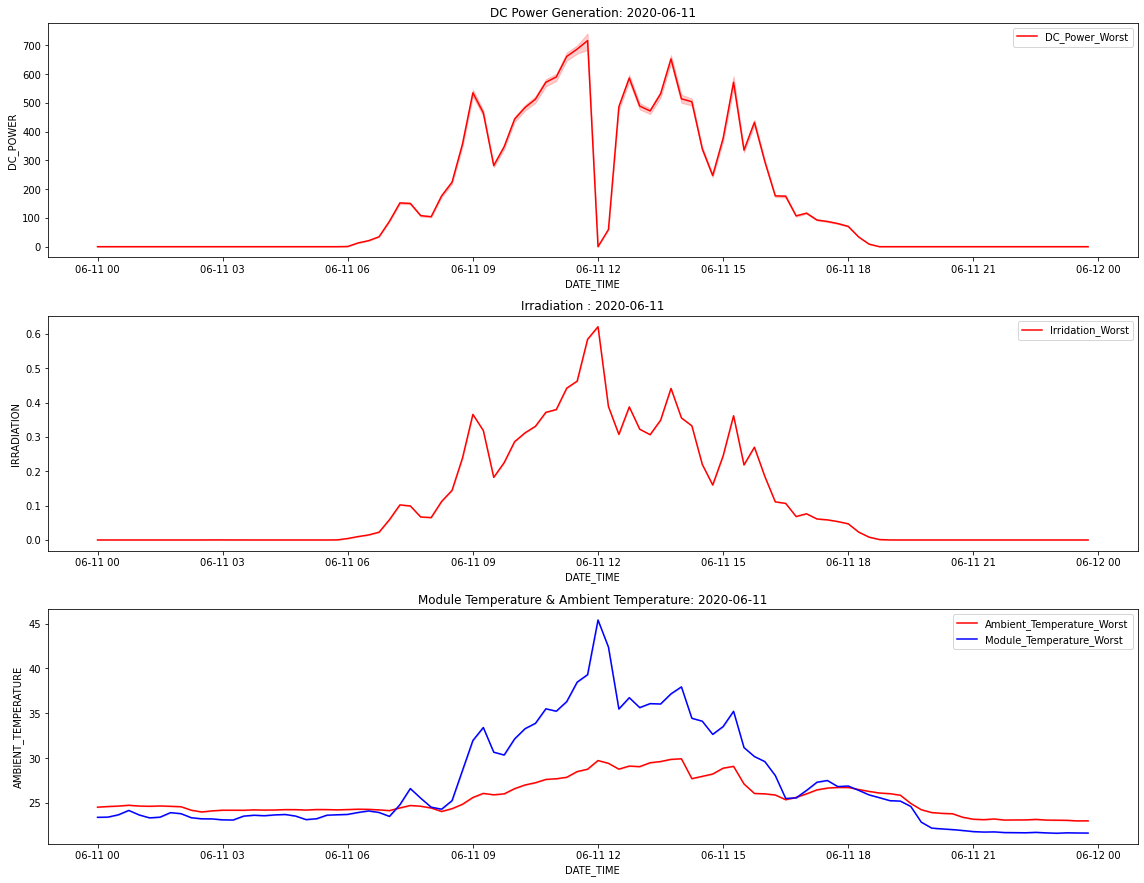

In [23]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst",color='red');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph
    </p>
</div>

**Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:**

> At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt. 

> And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

> Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced. 

<code style="background:yellow;color:red">The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system </code>

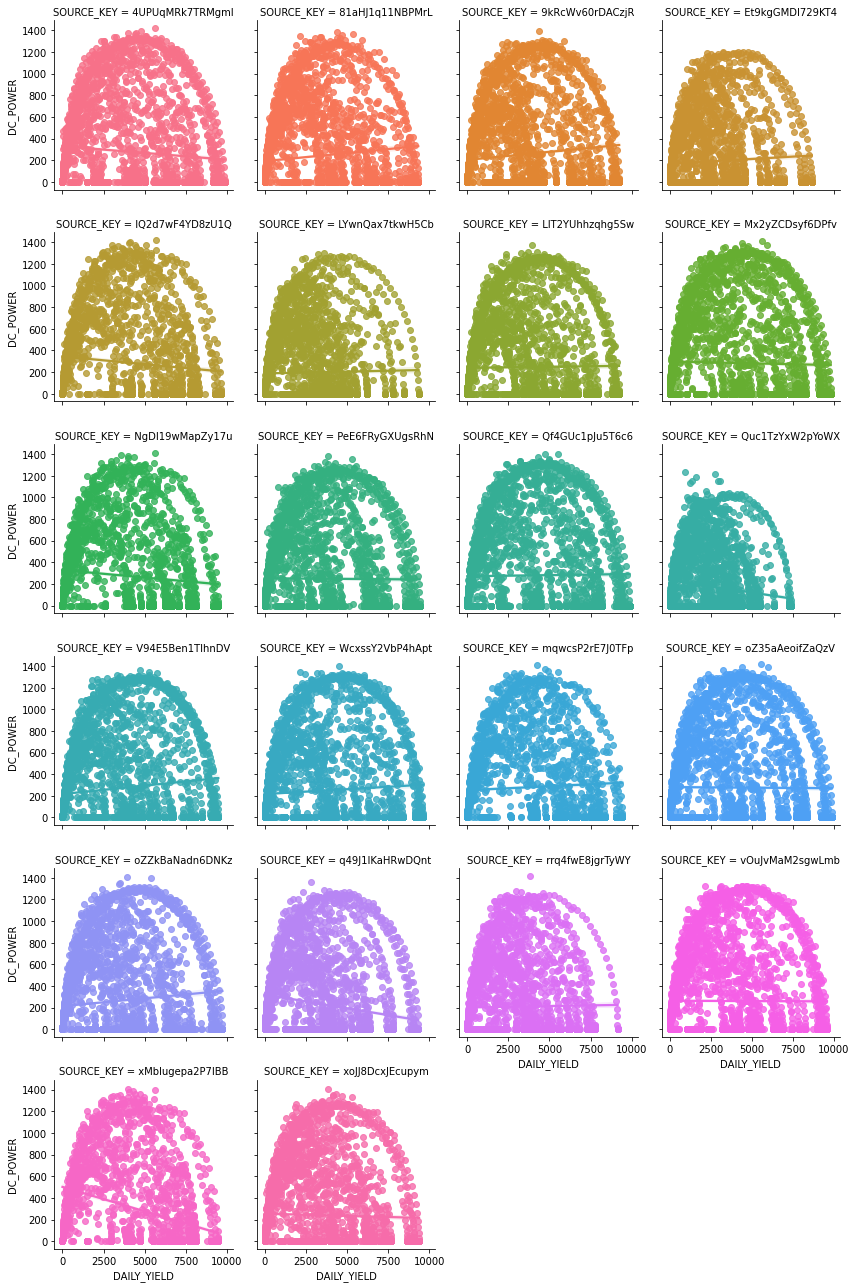

In [24]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Plant Inverter Efficiency Calculation </h1>

In [25]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [26]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [27]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [28]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

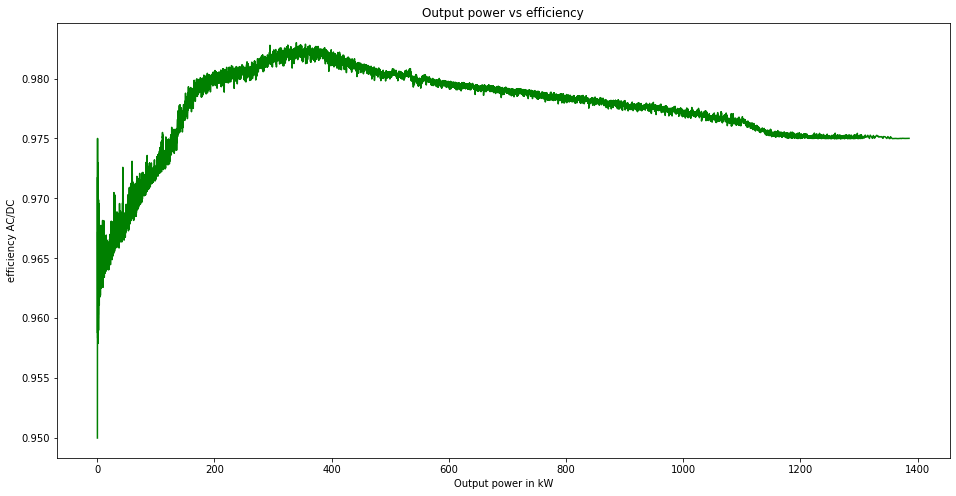

In [29]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">11. What does inverter efficiency mean?
</span>

- In fact, we shall discuss here the general power inverter efficiency whether it’s solar inverter or pure sine wave inverter or even modified sine wave inverter.

- The inverter efficiency refers to how much dc power will be converted to ac power, as some of power will be lost during this transition in two forms:

*Heat loss.*
- Stand-by power which consumed just to keep the inverter in power mode. Also, we can refer to it as inverter power consumption at no load condition.

- Hence, inverter efficiency = pac/pdc where pac refers to ac output power in watt and pdc refers to dc input power in watts.

<img src="https://www.inverter.com/images/uploaded/inverter-output-power-efficiency-diagram.jpg" alt="Solar Panel" width="90%">
</center>

> For the two basic inverters types in the market, the typical efficiency of high-quality pure sine wave inverter varied from 90% to 95% and for low quality modified sine wave inverter, it varied from 75% to 85%.

> This power inverter efficiency value depends on inverter load power capacity variation, as the efficiency increases and may reach to its max value at higher load power capacity in compare to lower loading power capacity, and in condition that not going above inverter output power capacity limit. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us harvest larger efficiency, which means larger inverter ac output power for the same dc input power.

[REFERENCE: ](https://www.inverter.com/what-is-inverter-efficiency)

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:#e90045">Solar Power Prediction</h1>

In [30]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [31]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [32]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. LinearRegression
</span>

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. RandomForestRegressor
</span>

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


<span style="background-color:yellow;
             color:Black;
             font-size:25px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. DecisionTreeRegressor
</span>

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">12. Result Prediction
</span>

In [38]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.72575238 ...    0.         1007.14018095
    0.        ]


In [39]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000,0.000
50974,0.000,0.000
53919,684.913,684.726
2384,0.000,0.000
22014,0.000,0.000


In [40]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000,0.000,0.000
50974,0.000,0.000,0.000
53919,684.913,684.726,0.188
2384,0.000,0.000,0.000
22014,0.000,0.000,0.000


In [41]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })


,Actual,Predicted,Error
19681,971.633,971.031,0.602
35768,0.000,0.000,0.000
54605,0.000,0.000,0.000
46146,0.000,0.000,0.000
13644,0.000,0.000,0.000
25546,0.000,0.000,0.000
38669,4.560,4.544,0.016
59634,0.000,0.000,0.000
2115,0.000,0.000,0.000
41306,1349.307,1348.696,0.612
